In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('predictive_maintenance.csv', encoding='utf-8-sig') 

In [3]:
data

,ï»¿UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [4]:
# Encode categorical columns
label_encoder = LabelEncoder()
data['Type'] = label_encoder.fit_transform(data['Type'])
data['Failure Type'] = label_encoder.fit_transform(data['Failure Type'])

In [5]:
# Prepare Features (X) and Target (y)
X = data.drop(columns=['Target', 'Failure Type', 'ï»¿UDI', 'Product ID'])
y = data['Target']

In [6]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

In [7]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=62)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=62)

In [8]:
# Make predictions
y_pred = model.predict(X_test)

In [9]:
# Model Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1925
           1       0.89      0.52      0.66        75

    accuracy                           0.98      2000
   macro avg       0.93      0.76      0.82      2000
weighted avg       0.98      0.98      0.98      2000

Confusion Matrix:
 [[1920    5]
 [  36   39]]


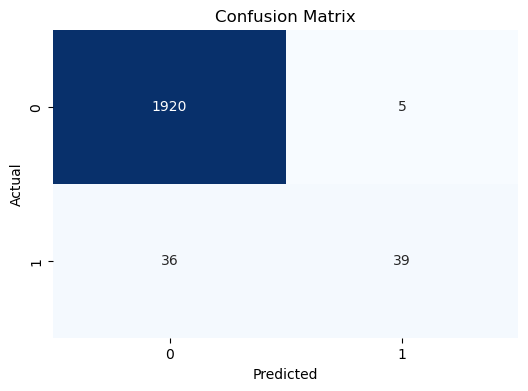

In [10]:
# 1. Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

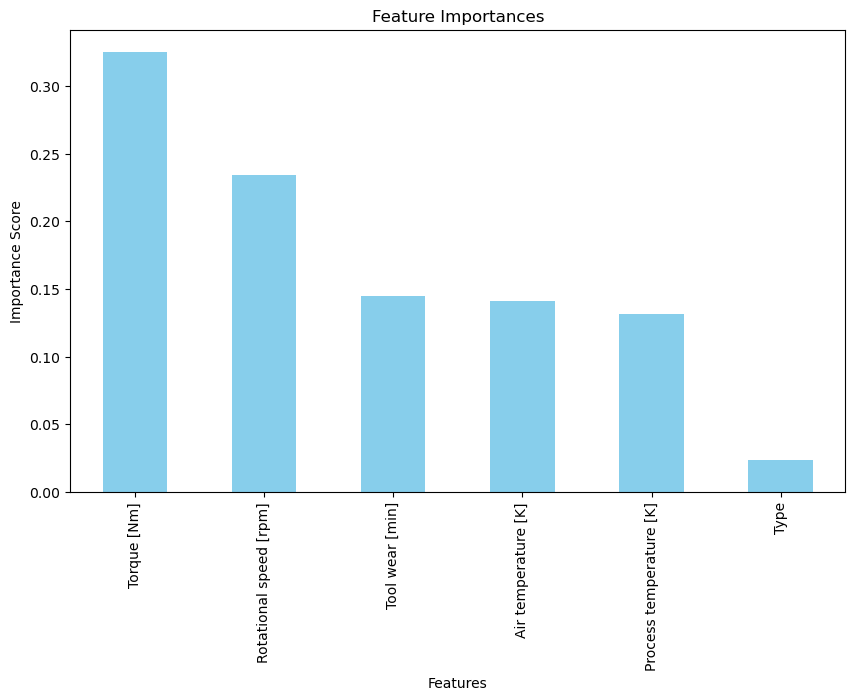

In [11]:
# 2. Plot Feature Importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color="skyblue")
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [12]:
# Get test samples predicted as failures (Target = 1)
predicted_failures = X_test[y_pred == 1]

In [13]:
# Maintenance Recommendations (Predicted Failures)
predicted_failures = X_test[y_pred == 1]
if not predicted_failures.empty:
    print("Machines predicted to fail soon (maintenance recommended):")
    print(predicted_failures)
    
    # Save maintenance recommendations to a CSV file
    predicted_failures.to_csv('maintenance_recommendations.csv', index=False)
else:
    print("No failures predicted in the test data.")

Machines predicted to fail soon (maintenance recommended):
      Type  Air temperature [K]  Process temperature [K]  \
2233     1                299.5                    308.7   
9014     2                297.2                    308.1   
463      1                297.4                    308.7   
6078     1                300.8                    310.7   
3935     2                302.6                    311.6   
7593     1                300.5                    311.2   
5909     0                300.7                    310.2   
4048     1                301.9                    311.0   
4078     0                302.1                    310.7   
4140     1                301.7                    310.2   
3528     1                302.0                    310.9   
1144     1                297.0                    307.9   
5152     1                304.3                    313.5   
4770     1                303.5                    311.9   
4936     1                303.5          

In [15]:
maintainence_recommendation = pd.read_csv('maintenance_recommendations.csv')

In [16]:
maintainence_recommendation

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,299.5,308.7,2549,13.0,179
1,2,297.2,308.1,1340,61.3,207
2,1,297.4,308.7,2874,4.2,118
3,1,300.8,310.7,1339,59.1,203
4,2,302.6,311.6,1227,68.2,187
5,1,300.5,311.2,1270,67.5,208
6,0,300.7,310.2,1364,65.3,208
7,1,301.9,311.0,2691,12.1,31
8,0,302.1,310.7,1294,62.4,101
9,1,301.7,310.2,1331,61.2,47
